In [1]:
import pandas as pd
import numpy as np
import os

from InputSetup import FFInputCreation as inputCreation
from ParameterManipulation import createTSParamFiles, createFFParamFiles, copyNominalFiles
from stochasticTurbulenceTools_mod import stochasticTurbulence

#### A few input parameters. If # of seeds does not apply, can set to one or modify other parts of this script to remove it.

In [2]:
nSeeds = 2

HubHt = 148.84
D=246.0

In [13]:
workdir='/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup'
os.chdir(workdir)

### Create cases based on ranges or discrete values?

In [4]:
Ranges = False

### Read in case parameters

In [5]:
if Ranges == False:
    ParamVals = pd.read_csv('../SampleFiles/ParamValues.csv', header=None,index_col=0,delimiter=',')
    nTurbs = int(ParamVals.shape[0]/3)
    nCases = int(ParamVals.shape[1])
else:
    #writeParamVals()
    OrigVals = pd.read_csv('../SampleFiles/ParamRanges.csv', names=['Var','MinVar','MaxVar','NomVar'])
    OrigVals = OrigVals['NomVar']

In [6]:
ParamVals

,1,2,3
0,,,
TI,A,B,C
Vhub,6.0,12.0,18.0
Shear,0.1,0.2,0.3
T1x-locs,0.0,0.0,0.0
T1y-locs,0.0,0.0,0.0
T2x-locs,1722.0,1722.0,1722.0
T2y-locs,0.0,369.0,-369.0
T3x-locs,3444.0,3444.0,3444.0
T3y-locs,0.0,369.0,-369.0


##### Detect the number of turbines in the simulation; this will have to be modified based on your input file

In [7]:
nTurbs=int(ParamVals[3:].shape[0]/2)

In [8]:
nCases=ParamVals.shape[1]

### This section can be modified based on how you want to name your directory structure

In [9]:
caseNames=['None']*nCases
for case in range(nCases):
    if case < 10:
        case = '0'+str(case)
    caseNames[int(case)] = 'Case{0}'.format(case)
    
ParamVals.columns=caseNames

### This section creates the directory structure and copies any nominal files from a specified directory to all directories created here. This will have to be modified based on the directory structure you want and the files you want to copy

In [10]:
os.getcwd()

'/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup'

In [11]:
for case in range(nCases):
    name1=caseNames[case]
    if not os.path.exists(name1):
        os.makedirs(name1)
    os.chdir(name1)
    print(os.getcwd())
    copyNominalFiles(nSeeds,nTurbs)
    os.chdir('..')
os.chdir('..')

os.chdir(workdir)

/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00/Seed_0
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00/Seed_1
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case01
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case01/Seed_0
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case01/Seed_1
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case02
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case02/Seed_0
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case02/Seed_1


# Create TurbSim Files

## The following command creates the .inp files for the low- and high-resolution domains, as well as a .inp file for each turbine in the simulation.

In [14]:
os.chdir(workdir)

/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00/Seed_0
('Writing TurbSim input file: ', 'TSParams.txt')
(-890.882481, 890.882481)
Writing a new Low.inp file from scratch
Writing a new HighT1.inp file from scratch
Writing a new HighT2.inp file from scratch
Writing a new HighT3.inp file from scratch
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00/Seed_1
('Writing TurbSim input file: ', 'TSParams.txt')
(-890.882481, 890.882481)
Writing a new Low.inp file from scratch
Writing a new HighT1.inp file from scratch
Writing a new HighT2.inp file from scratch
Writing a new HighT3.inp file from scratch
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case01/Seed_0
('Writing TurbSim input file: ', 'TSParams.txt')
(-890.882481, 890.882481)
Writing a new Low.inp file from scratch
Writing a new HighT1.inp file from scratch
Writing a new HighT2.inp file from scratch
Writing a new HighT3.inp file from scratch
/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Ca

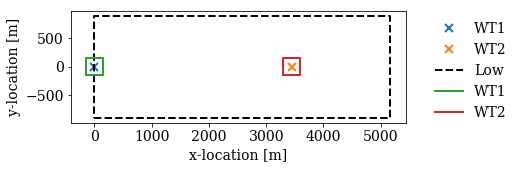

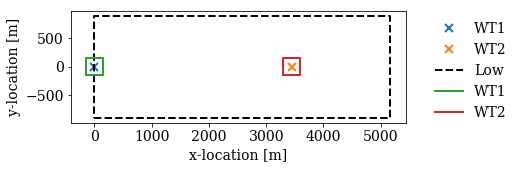

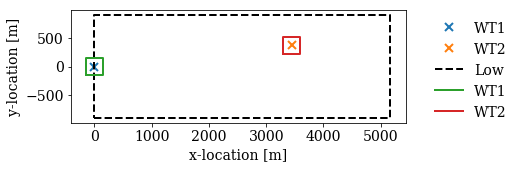

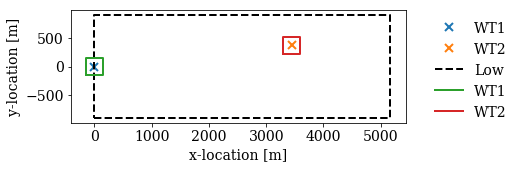

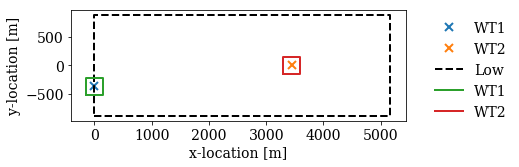

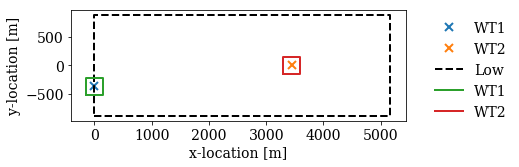

In [15]:
createTSParamFiles(caseNames,nSeeds,ParamVals,D,HubHt,'TSParams.txt')

## You are now ready to run TurbSim simulations to create the low-resolution domains. You can not yet create the high-resolution domains!!

### Once the low-resolution simulations are complete, you are ready to finish generating the input files required for the high-resolution TurbSim domains, and you can move on to the next step.

## The following command creates the User-specified time series files that are required to finish generating the high-resolution TurbSim domains. This step will extract the time series from the .bts file from the low-resolution domain at each of the turbine locations and write them out into .txt files.

In [16]:
def writeTimeSeriesFile(fileOut,yloc,zloc,u,v,w,time):
    import math
    """ Write a TurbSim primary input file, 

    """

    print('Writing {0}'.format(fileOut))
    # --- Writing TurbSim user-defined time series file
    with open(fileOut, 'w') as f:
        f.write('--------------TurbSim v2.00.* User Time Series Input File-----------------------\n')
        f.write('     Time series input from Experimental Data\n')
        f.write('--------------------------------------------------------------------------------\n')
        f.write('          3 nComp - Number of velocity components in the file\n')
        f.write('          1 nPoints - Number of time series points contained in this file (-)\n')
        f.write('          1 RefPtID - Index of the reference point (1-nPoints)\n')
        f.write('     Pointyi Pointzi ! nPoints listed in order of increasing height\n')
        f.write('       (m)     (m)\n')
        f.write('       {0}   {1}\n'.format(yloc,zloc))
        f.write('--------Time Series-------------------------------------------------------------\n')
        f.write('Elapsed Time            Point01u                Point01v                Point01w\n')
        f.write('       (s)             (m/s)                   (m/s)                   (m/s)\n')
        for i in range(time.shape[0]):
            f.write('{:.2f}\t{:.5f}\t{:.5f}\t{:.5f}\n'.format(time[i],u[i],v[i],w[i]))

In [18]:
nSeeds=1
yloc = 0.0
zloc = HubHt
for case in ['Case00']:#caseNames:
    xlocs=['None']*nTurbs
    ylocs=['None']*nTurbs
    for wt in range(nTurbs):
        xlocs[wt]=float(ParamVals[case][3+wt*2])
        ylocs[wt]=float(ParamVals[case][4+wt*2])
    for seed in range(nSeeds):
        abspath = '/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/{0}/Seed_{1}/TurbSim/'.format(case,seed)
        
        TSpathLow  = abspath+'Low'
        print(TSpathLow)
        IFdata = stochasticTurbulence(D,prefix=TSpathLow)
        IFdata.readBTS('.',HubHt)
        meanu = IFdata.u[:,IFdata.jHub,IFdata.kHub].mean()
        Width = IFdata.dY*(IFdata.nY-1)
        lowTime = np.arange(0, IFdata.nSeconds, IFdata.dT)
        
        for wt in range(nTurbs):
            tstart=int(xlocs[wt]/meanu/IFdata.dT+3.0*D) ## This 3D is based on the default in this scripts to start the FFarm domain 3D upstream of the most upstream turbine. Modify if needed

            tmp = lowTime.shape[0]-tstart

            TurbLoc_rel=ylocs[wt]+Width/2.

            fileOut = abspath+'USRTimeSeries_T{0}.txt'.format(wt)

            uvel = np.zeros(lowTime.shape[0])
            vvel = np.zeros(lowTime.shape[0])
            wvel = np.zeros(lowTime.shape[0])

            uvel[:tmp] = IFdata.u[tstart:,IFdata.y2j(TurbLoc_rel),IFdata.kHub]
            vvel[:tmp] = IFdata.v[tstart:,IFdata.y2j(TurbLoc_rel),IFdata.kHub]
            wvel[:tmp] = IFdata.w[tstart:,IFdata.y2j(TurbLoc_rel),IFdata.kHub]

            uvel[tmp:] = IFdata.u[:tstart,IFdata.y2j(TurbLoc_rel),IFdata.kHub]
            vvel[tmp:] = IFdata.v[:tstart,IFdata.y2j(TurbLoc_rel),IFdata.kHub]
            wvel[tmp:] = IFdata.w[:tstart,IFdata.y2j(TurbLoc_rel),IFdata.kHub]


            writeTimeSeriesFile(fileOut,yloc,zloc,uvel,vvel,wvel,lowTime)

/home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00/Seed_0/TurbSim/Low
Opening file /home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00/Seed_0/TurbSim/Low.bts...
Writing /home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00/Seed_0/TurbSim/USRTimeSeries_T0.txt
Writing /home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00/Seed_0/TurbSim/USRTimeSeries_T1.txt
Writing /home/kshaler/python-toolbox/pyFAST/fastfarm/FFarmSetup/Case00/Seed_0/TurbSim/USRTimeSeries_T2.txt


### You are now ready to run TurbSim for each of your high-res domains!
######  
### Once those domains are created, you are ready for the final step of creating the FAST.Farm input (.fstf) input file

In [11]:
os.getcwd()

'/lustre/eaglefs/scratch/kshaler/FFarmSetup/Case00'

In [10]:
createFFParamFiles(caseNames,nSeeds,ParamVals,HubHt,D,'FFarmParams.txt')

/lustre/eaglefs/scratch/kshaler/FFarmSetup/Case00
Opening file Seed_0/TurbSim/Low.bts...


AttributeError: stochasticTurbulence instance has no attribute 'RefHt'

In [12]:
ParamVals[case]

,Case00,Case01,Case02
0,,,
TI,A,B,C
Vhub,6.0,12.0,18.0
Shear,0.1,0.2,0.3
T1x-locs,0.0,0.0,0.0
T1y-locs,0.0,0.0,0.0
T2x-locs,1722.0,1722.0,1722.0
T2y-locs,0.0,369.0,-369.0
T3x-locs,3444.0,3444.0,3444.0
T3y-locs,0.0,369.0,-369.0
